<a href="https://colab.research.google.com/github/Luca-Skyline/Check4Mate/blob/main/Chess_Piece_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import gc

print(tf.__version__)

2.13.0


In [2]:
!git clone https://github.com/Luca-Skyline/check4mate/
%cd /content/check4mate/Chess_Classification_Dataset

Cloning into 'check4mate'...
remote: Enumerating objects: 19925, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 19925 (delta 15), reused 10 (delta 2), pack-reused 19892
Receiving objects: 100% (19925/19925), 158.04 MiB | 16.85 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Updating files: 100% (23311/23311), done.
/content/check4mate/Chess_Classification_Dataset


In [3]:
class_names = []

train_labels = []

for class_index, folder in enumerate(os.listdir('train/')):
  train_images = []
  current_folder_path = os.path.join('train/', folder)
  if os.path.isdir(current_folder_path):
    class_names.append(folder)
    for image in os.listdir(current_folder_path):
      current_image_path = os.path.join(current_folder_path, image)
      if os.path.isfile(current_image_path):
        image = cv2.imread(current_image_path, cv2.IMREAD_GRAYSCALE)
        pixel_array = np.array(image.tolist())
        train_images.append(pixel_array)
        train_labels.append(class_index)
  train_images = np.array(train_images)
  with open(f'train_images_{class_index}.pk1', 'wb') as file:
    pickle.dump(train_images, file)
  del train_images

train_labels = np.array(train_labels)
with open('train_labels.pk1', 'wb') as file:
  pickle.dump(train_labels, file)

del train_labels

In [4]:
class_names

['bq',
 'wb',
 'br',
 'bn',
 'bk',
 'wq',
 'empty',
 'bb',
 'wp',
 'bp',
 'wr',
 'wk',
 'wn']

In [5]:
test_images = []
test_labels = []

for class_index, folder in enumerate(os.listdir('valid/')):
  current_folder_path = os.path.join('valid/', folder)
  if os.path.isdir(current_folder_path):
    for image in os.listdir(current_folder_path):
      current_image_path = os.path.join(current_folder_path, image)
      if os.path.isfile(current_image_path):
        image = cv2.imread(current_image_path, cv2.IMREAD_GRAYSCALE)
        pixel_array = np.array(image.tolist())
        test_images.append(pixel_array)
        test_labels.append(class_index)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

with open('test_images.pk1', 'wb') as file:
   pickle.dump(test_images, file)

with open('test_labels.pk1', 'wb') as file:
   pickle.dump(test_labels, file)

del test_images
del test_labels

(224, 224)


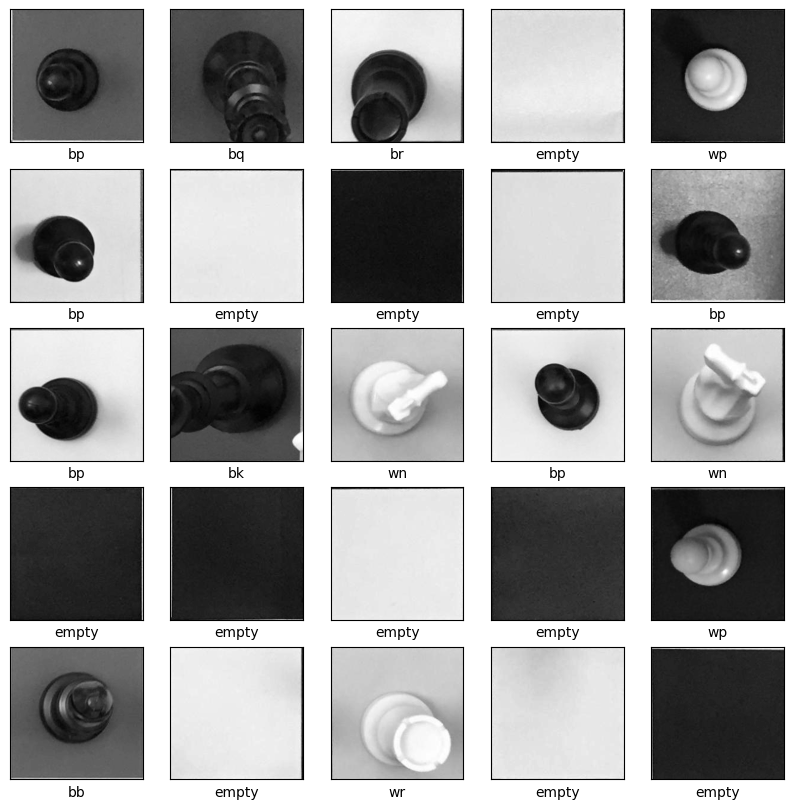

In [9]:
import random

with open('test_images.pk1', 'rb') as file:
  test_images = pickle.load(file)

with open('test_labels.pk1', 'rb') as file:
  test_labels = pickle.load(file)

print(test_images[0].shape)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = random.randint(0, test_images.shape[0])
    plt.imshow(test_images[index], cmap='gray')
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[index]])
plt.show()

In [ ]:
dataset.location

'/content/Chess-Piece-Detector-1'